In [364]:
import pandas as pd;
import numpy as np;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [365]:
df = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [366]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Random under-sampling:
N    192
Y    192
Name: Loan_Status, dtype: int64


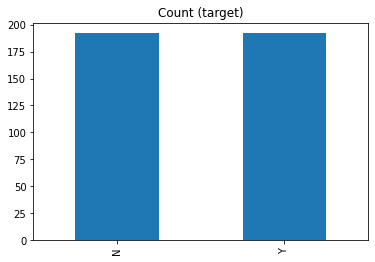

In [367]:
# Random Under-Sampling
df_success = df[df['Loan_Status'] == 'Y']
df_failure = df[df['Loan_Status'] == 'N']
df_success_under = df_success.sample(df.Loan_Status.value_counts()[1])
df_test_under = pd.concat([df_success_under, df_failure], axis=0)

print('Random under-sampling:')
print(df_test_under.Loan_Status.value_counts())

df_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

df_under = df_test_under;

In [368]:
#fix missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

df_under['Gender'].fillna(df_under['Gender'].mode()[0], inplace=True) 
df_under['Married'].fillna(df_under['Married'].mode()[0], inplace=True) 
df_under['Dependents'].fillna(df_under['Dependents'].mode()[0], inplace=True) 
df_under['Self_Employed'].fillna(df_under['Self_Employed'].mode()[0], inplace=True) 
df_under['Credit_History'].fillna(df_under['Credit_History'].mode()[0], inplace=True)
df_under['Loan_Amount_Term'].fillna(df_under['Loan_Amount_Term'].mode()[0], inplace=True)
df_under['LoanAmount'].fillna(df_under['LoanAmount'].median(), inplace=True)

In [369]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [370]:
outcome_under = df_under['Loan_Status']
df_under = df_under.drop(['Loan_Status'], axis=1)
df_under = df_under.drop(['Loan_ID'], axis=1)
#df_under['DAYS_BIRTH'] = abs(df_under['DAYS_BIRTH']);
#df_under['DAYS_EMPLOYED'] = abs(df_under['DAYS_EMPLOYED']);
df_under = df_under.loc[:, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']];
df_under = df_under.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
le = preprocessing.LabelEncoder()
for column in df_under:
    if type(df_under[column].iloc[0]) == str:
        df_under[column] = le.fit_transform(df_under[column])

outcome = df['Loan_Status']
df = df.drop(['Loan_Status'], axis=1)
df = df.drop(['Loan_ID'], axis=1)
#df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']);
#df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']);
df = df.loc[:, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']];
#df=df.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       #'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       #'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       #'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       #'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       #'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       #'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       #'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       #'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       #'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       #'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       #'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       #'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       #'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       #'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       #'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
#df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].apply(lambda o: 0 if o == "Cash loans" else 1)
#df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda o: 0 if o == "F" else 1)
#df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].apply(lambda o: 0 if o == "N" else 1)
#df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].apply(lambda o: 0 if o == "N" else 1)
df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
le = preprocessing.LabelEncoder()
#df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
#df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
#df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
#df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
for column in df:
    if type(df[column].iloc[0]) == str:
        df[column] = le.fit_transform(df[column])
        print(le.classes_)

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Semiurban' 'Urban']


In [371]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [372]:
# Split the data for prediction
X_train, X_test, y_train, y_test = train_test_split(df, outcome, shuffle=True, random_state=1)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(df_under, outcome_under, shuffle=True, random_state=1)

In [373]:
# Scale and Standardize Data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_under)

X_train = scaler.transform(X_train_under)

In [417]:
# Make prediction
clf = RandomForestClassifier(criterion="entropy", max_features="sqrt", n_estimators=100, random_state=0, max_depth=10)
clf.fit(X_train_under, y_train_under);
accuracy = clf.score(X_test_under, y_test_under);

In [418]:
# Find most predictive words using information gain
importances_sorted = clf.feature_importances_;
importances_sorted[::-1].sort();

In [419]:
topattributes = [];
for i in range(10):
    index = np.where(clf.feature_importances_ == importances_sorted[i]);
    topattributes.append(df.columns[index[0]][0]);
topattributes

['Credit_History',
 'ApplicantIncome',
 'LoanAmount',
 'CoapplicantIncome',
 'Property_Area',
 'Loan_Amount_Term',
 'Dependents',
 'Married',
 'Education',
 'Self_Employed']

In [420]:
df['NAME_TYPE_SUITE'].unique()

KeyError: 'NAME_TYPE_SUITE'

In [421]:
accuracy = clf.score(X_test, y_test);
accuracy

0.8701298701298701

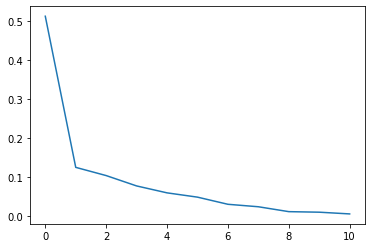

In [395]:
plt.plot(importances_sorted)

In [450]:
#[-9461, 24700.5, -637, 406597.5, 202500.0]
clf.predict([[0, 0, 1, 0, 0, 4000, 0, 100, 360, 1, 1]])[0]

'Y'

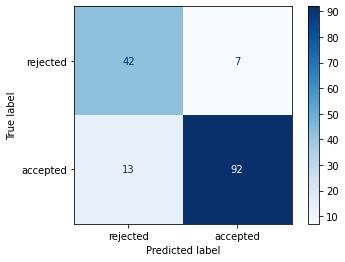

In [423]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['rejected', 'accepted'],
                                 cmap=plt.cm.Blues)

In [382]:
topattributesdf = df.loc[:, topattributes]
topattributesdf['index'] = range(topattributesdf.shape[0])
topattributesdf['outcome'] = outcome.apply(lambda o: "Accepted" if o == "Y" else "Rejected")
topattributesdf = topattributesdf.melt(id_vars=['index', 'outcome'], value_vars=topattributes, var_name='attr', value_name='value')
#topattributesdf = topattributesdf.drop(topattributesdf[topattributesdf.value == 0].index)
#top10wordsdf = top10wordsdf.sort_values(by="rate")

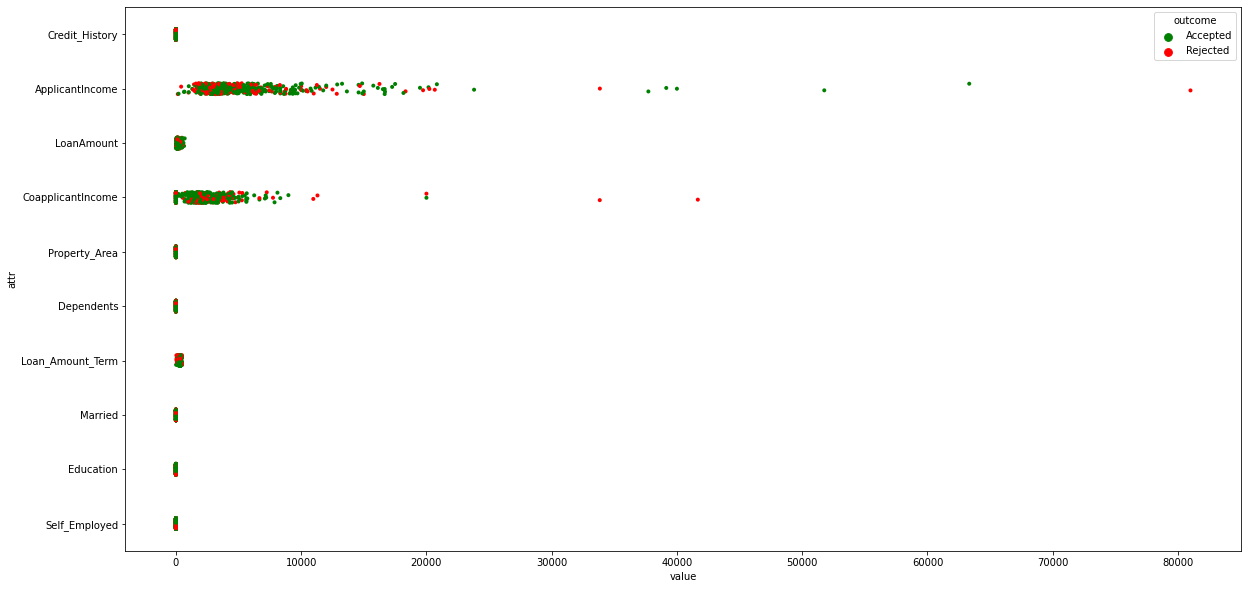

In [383]:
plt.figure(figsize=(20, 10))
sns.stripplot(x="value", y="attr", hue="outcome", palette=["green", "red"], size=4, data=topattributesdf);

In [323]:
outcome

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [357]:
import pickle
filename = 'beta_model_3.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [229]:
X_test

,Principal,terms,age,education,Gender
304,800,15,24,0,1
340,1000,30,30,1,0
47,1000,30,32,3,1
67,1000,30,37,1,1
479,1000,30,27,0,1
...,...,...,...,...,...
469,1000,30,26,1,1
41,800,15,30,3,1
159,1000,30,27,1,1
286,1000,30,29,3,1


In [424]:
from sklearn.tree import export_graphviz
import pydotplus
estimator = clf.estimators_[5]
export_graphviz(estimator, 
                out_file="tree.dot", 
                feature_names = df.columns,
                class_names = outcome,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [415]:
graph=pydotplus.graph_from_dot_data("./tree.dot")
graph.write_png("dot.png")

./tree.dot
^
Expected {'graph' | 'digraph'}, found '.'  (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'write_png'

In [396]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2
